In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression


In [3]:
df = pd.read_csv('../WEEK 3/data-week-3.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)


In [4]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']


In [5]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]


In [6]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [7]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()


0.8034066713981547

In [8]:
from sklearn.metrics import accuracy_score

In [9]:
t=0.5

In [10]:
accuracy_score(y_val,y_pred >= t)

0.8034066713981547

In [11]:
thresholds = np.linspace(0,1,21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val,y_pred >= t)
    print("%.2f %.3f"%(t,score))
    scores.append(score) # append to scores array




0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


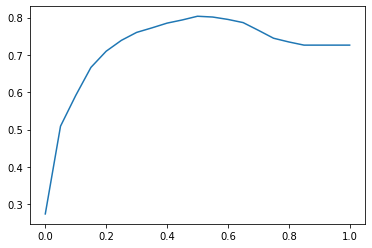

In [12]:
plt.plot(thresholds,scores)

In [13]:
from collections import Counter # Counting yes/no chourning 
Counter(y_val)

# Class imbalance (much more true values than false ones)

Counter({0: 1023, 1: 386})

In [14]:
actual_positive = (y_val ==1 )
actual_negative = (y_val ==0 )


In [15]:
threshold = 0.5

predict_positive = (y_pred >= threshold)
predict_negative = (y_pred < threshold)

In [16]:
results = Counter(predict_positive & actual_positive)

([<matplotlib.patches.Wedge at 0x7f9494da7df0>,
 [Text(-1.0708427901141044, 0.5415678340343342, 'False'),
  Text(1.0708427647614829, -0.541567884164103, 'True')],
 [Text(-0.9816058909379292, 0.4964371811981397, '85%'),
  Text(0.981605867698026, -0.4964372271504278, '15%')])

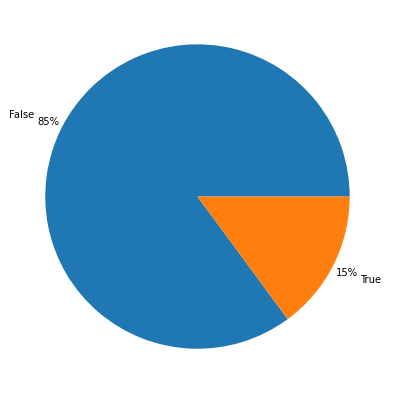

In [17]:
fig = plt.figure(figsize =(10, 7))
plt.pie([float(v) for v in results.values()], labels = ['False','True'],pctdistance=1.1, labeldistance=1.2,autopct='%1.0f%%')


In [18]:
# Creating true positives and true negatives
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

# False positives and false negatives
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()


In [19]:
fp,fn

(101, 176)

In [20]:
#Creating the confusion matrix
confusion_matrix = np.array([
    [tn,fp],
    [fn,tp]
])

In [21]:
( confusion_matrix / confusion_matrix.sum() ).round(2) # PORCENTAGE OF CORRECT 

array([[0.65, 0.07],
       [0.12, 0.15]])

In [22]:
(tp + tn) / ( tp + tn + fp + fn)

0.8034066713981547

# 4.4 precision and Recall

## Precision
- Fraction of positive predictions that are correct.

$$P=\frac{TP}{TP+FP}$$


## Recall
- Fraction of correctly identified positive examples.

- We will only use the $g(x_i) \geq t$ (FN) and y=1 (TP) part of the data set

$$R= \frac{TP}{ \# Positive (OBS)} =\frac{TP}{TP+FN} $$
$$R= \frac{3}{4} = 75 \%$$

In [23]:
recall = tp/ (tp + fn)

In [24]:
recall

0.5440414507772021

In [25]:
tp + fn

386

# 4.5 ROC CURVES

$$ FPR = \frac{FP}{TN+FP} $$


$$TPR= \frac{TP}{FN+TP}$$

- Minimize FP
- Max TP

In [26]:
tpr = tp/(tp+fn)
tpr # same as recall

0.5440414507772021

In [27]:
fpr = fp/(fp+tn)
fpr

0.09872922776148582

In [28]:
scores = []

thresholds = np.linspace(0,1,101)

for t in thresholds:
    actual_positive = (y_val ==1 )

    actual_negative = (y_val ==0 )
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)


    # Creating true positives and true negatives
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    # False positives and false negatives
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    #append tuple of true positives and false negatives

    scores.append((t,tp,fp,fn,tn))

In [29]:
columns = ['threshold', 'tp','fp','fn','tn']
df_scores = pd.DataFrame(scores,columns=columns) # Creating a data frame with pandas

In [30]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

df_scores[::10] # Each tenth record

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,366,556,20,467,0.948187,0.543500
20,0.2,333,356,53,667,0.862694,0.347996
30,0.3,284,236,102,787,0.735751,0.230694
40,0.4,249,166,137,857,0.645078,0.162268
50,0.5,210,101,176,922,0.544041,0.098729
60,0.6,150,53,236,970,0.388601,0.051808
70,0.7,76,20,310,1003,0.196891,0.019550
80,0.8,13,1,373,1022,0.033679,0.000978
90,0.9,0,0,386,1023,0.000000,0.000000


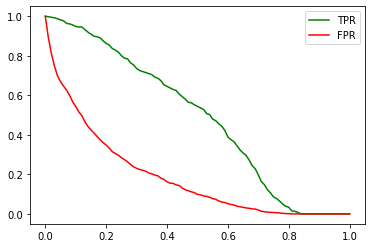

In [31]:

# Ploting the results

plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR',color="green")
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR',color="red")
plt.legend()

# Minimize FPR , Maximize TPR

# Random Model

In [32]:
np.random.seed(1)
y_rand = np.random.uniform(0,1,size=len(y_val))

y_rand.round(3)

array([0.417, 0.72 , 0.   , ..., 0.774, 0.334, 0.089])

In [33]:
((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

In [34]:
def tpr_fpr_dataframe(y_val,y_pred):
    scores = []
    thresholds = np.linspace(0,1,101)
    for t in thresholds:
        actual_positive = (y_val ==1 )
        actual_negative = (y_val ==0 )
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        # Creating true positives and true negatives
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        # False positives and false negatives
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
        #append tuple of true positives and false negatives

        scores.append((t,tp,fp,fn,tn))
    columns = ['threshold', 'tp','fp','fn','tn']
    df_scores = pd.DataFrame(scores,columns=columns) # Creating a data frame with pandas    
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores


In [35]:
df_rand = tpr_fpr_dataframe(y_val,y_rand)

In [36]:
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,39,100,0.898964,0.902248
20,0.2,307,822,79,201,0.795337,0.803519
30,0.3,276,724,110,299,0.715026,0.707722
40,0.4,237,624,149,399,0.613990,0.609971
50,0.5,202,518,184,505,0.523316,0.506354
60,0.6,161,409,225,614,0.417098,0.399804
70,0.7,121,302,265,721,0.313472,0.295210
80,0.8,78,206,308,817,0.202073,0.201369
90,0.9,40,101,346,922,0.103627,0.098729


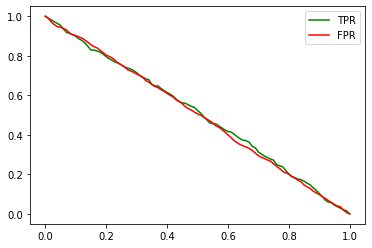

In [37]:
plt.plot(df_scores.threshold, df_rand['tpr'], label='TPR',color="green")
plt.plot(df_scores.threshold, df_rand['fpr'], label='FPR',color="red")
plt.legend()

In [38]:
num_neg = (y_val == 0 ).sum()
num_pos = (y_val == 1 ).sum()
num_pos,num_neg

(386, 1023)

In [39]:
y_ideal=np.repeat([0,1],[num_neg,num_pos])

y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [40]:
y_ideal_pred = np.linspace(0,1,len(y_val))

In [41]:
( (y_ideal_pred >= 0.726) == y_ideal ).mean() # perfect model

1.0

In [42]:
df_ideal = tpr_fpr_dataframe(y_ideal,y_ideal_pred)

In [43]:
df_ideal

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,386,1023,0,0,1.000000,1.000000
1,0.01,386,1008,0,15,1.000000,0.985337
2,0.02,386,994,0,29,1.000000,0.971652
3,0.03,386,980,0,43,1.000000,0.957967
4,0.04,386,966,0,57,1.000000,0.944282
...,...,...,...,...,...,...,...
96,0.96,57,0,329,1023,0.147668,0.000000
97,0.97,43,0,343,1023,0.111399,0.000000
98,0.98,29,0,357,1023,0.075130,0.000000
99,0.99,15,0,371,1023,0.038860,0.000000


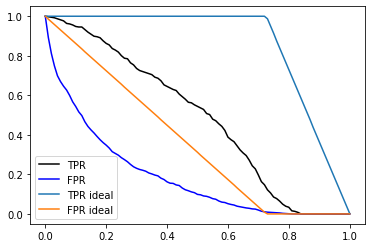

In [44]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR', color='black')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR', color='blue')

plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR ideal')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR ideal')

# plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR random', color='grey')
# plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR random', color='grey')

plt.legend()

Curve should be as close as possible to the ideal model


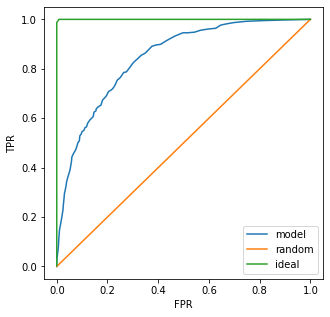

In [45]:
plt.figure(figsize=(5,5))

plt.plot(df_scores.fpr,df_scores.tpr, label='model')
plt.plot([0,1],[0,1], label='random')
plt.plot(df_ideal.fpr,df_ideal.tpr, label='ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')


print("Curve should be as close as possible to the ideal model")

plt.legend()

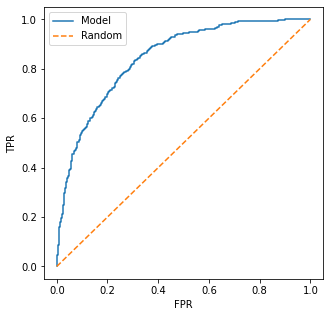

In [46]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, y_pred)

plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [47]:
from sklearn.metrics import auc # for any curve 

auc(fpr,tpr)

0.8438479732980819

In [48]:
auc(df_ideal.fpr,df_ideal.tpr)

0.9999430203759136

In [49]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_val,y_pred)

0.8438479732980819

In [50]:
import random 

neg = y_pred[y_val == 0 ]
pos = y_pred[y_val == 1 ]

n= 100000
success= 0

for i in range(n):
    pos_ind = random.randint(0,len(pos)-1)
    neg_ind = random.randint(0,len(neg)-1)
    if pos[pos_ind] > neg[neg_ind]:
        success= success + 1


success/n


0.84429

In [51]:
n= 50000
np.random.seed(1)
pos_ind = np.random.randint(0,len(pos),size=n)
neg_ind = np.random.randint(0,len(neg),size=n)

In [52]:

(pos[pos_ind] > neg[neg_ind]).mean()

Counter(pos[pos_ind] > neg[neg_ind])

Counter({True: 42323, False: 7677})

In [53]:

(pos[pos_ind] > neg[neg_ind]).mean()

0.84646

# Cross-Validation

- Splitting the data into 2 parts ( full_train and test )

In [54]:
def train(df_train, y_train, C=1.0):

    dicts = df_train[categorical + numerical].to_dict(orient='records')
    dv= DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    model = LogisticRegression(C=C ,max_iter=1000) # adding parameter
    model.fit(X_train,y_train)
    return dv,model

In [55]:
dv,model = train(df_train,y_train,C=0.0001) # Smaller C means stronger Regularization

In [56]:
def predict(df,dv,model):
    dicts = df[categorical + numerical].to_dict(orient='records')
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:,1]
    return y_pred

In [57]:
y_pred = predict(df_val,dv,model)

In [58]:
from sklearn.model_selection import KFold

# take the data set,  and splitting it into 10 parts

In [59]:
kfold = KFold(n_splits=10,shuffle=True,random_state=1)

In [60]:
train_idx,val_idx= next(kfold.split(df_full_train))

In [61]:
len(train_idx),len(val_idx)

(5070, 564)

In [62]:
len(df_full_train)

5634

In [63]:
from tqdm.auto import tqdm

ModuleNotFoundError: No module named 'tqdm'

In [ ]:
df_train = df_full_train.iloc[train_idx]
df_val = df_full_train.iloc[val_idx]


n_splits=5


for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    scores= []
    for train_idx,val_idx in kfold.split(df_full_train):

        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
        y_train = df_train.churn.values
        y_val = df_val.churn.values
        dv,model = train(df_train,y_train,C=C)
        y_pred = predict(df_val,dv,model)
        auc= roc_auc_score(y_val,y_pred)    
        scores.append(auc)
    print("C=%s %.3f + - %.3f " %(C,np.mean(scores),np.std(scores)))

In [ ]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8572386167896259

In [ ]:
df_full_train.shape

(5634, 21)

In [ ]:
df_full_train.churn.values.shape

(5634,)

In [ ]:
round(np.mean(scores),3),round(np.std(scores),3)


(0.841, 0.007)